**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
ASSAY  = "A001_K562_WSTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

## Import data

In [8]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")
dat = read_tsv(fpath, col_names = cnames)
dat = dat %>%
    dplyr::mutate(
        Peak   = paste(Chrom, Start, End, sep="_"),
        Length = End - Start
    )

dat_peak_atac_wgs = dat
print(dim(dat))
head(dat)

Rows: 247520 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Chrom
dbl (2): Start, End

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 247520      5


Chrom,Start,End,Peak,Length
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr1,10015,10442,chr1_10015_10442,427
chr1,14253,14645,chr1_14253_14645,392
chr1,16015,16477,chr1_16015_16477,462
chr1,17237,17772,chr1_17237_17772,535
chr1,28903,29613,chr1_28903_29613,710
chr1,30803,31072,chr1_30803_31072,269


In [9]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.Log2FC.raw.cpm.WGS.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_cpm_wstarr = dat
print(dim(dat))
head(dat)

Rows: 246832 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (4): Input, Output, Log2FC, pLog2FC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 246832      5


Peak,Input,Output,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_100006256_100006880,0.52903432,0.40233846,-0.39495167,-0.12478620
chr1_100010437_100010915,0.27321532,0.26269972,-0.05662371,-0.01196482
chr1_10002087_10003910,0.60864614,0.53656704,-0.18184528,-0.06613630
chr1_100021298_100021629,0.07650616,0.06746985,-0.18133305,-0.01216126
chr1_100023727_100023976,0.10056040,0.11803226,0.23111898,0.02272350
chr1_100027983_100029702,0.73136318,0.66935059,-0.12782594,-0.05262141


## Merge data

In [11]:
dat = inner_join(
    dat_peak_atac_wgs,
    dat_peak_cpm_wstarr,
    by = "Peak"
)

dat_peak_full = dat
print(dim(dat))
head(dat)

[1] 246832      9


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,427,0.016461261,0.000000000,-Inf,-0.0235552330
chr1,14253,14645,chr1_14253_14645,392,0.000000000,0.001015686,Inf,0.0014645821
chr1,16015,16477,chr1_16015_16477,462,0.063932438,0.104755936,0.7124120,0.0543211436
chr1,17237,17772,chr1_17237_17772,535,0.151108138,0.113572871,-0.4119631,-0.0478274017
chr1,28903,29613,chr1_28903_29613,710,0.002366887,0.023860007,3.3335319,0.0306078068
chr1,101603,101849,chr1_101603_101849,246,0.004668171,0.005125856,0.1349357,0.0006570832


## Visualization

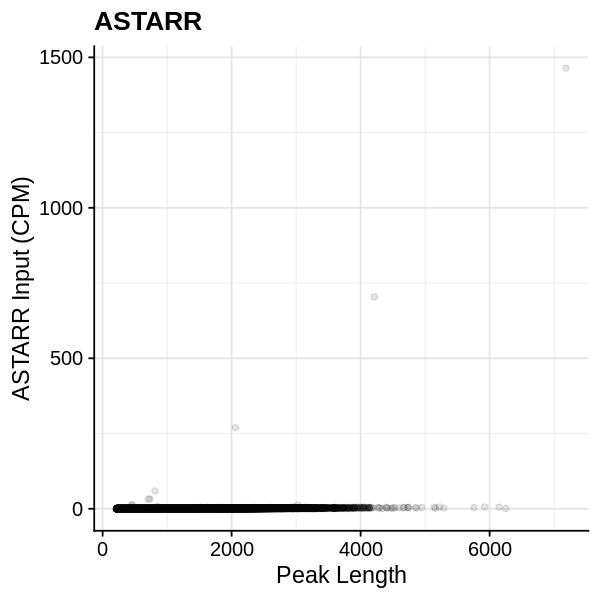

In [12]:
dat = dat_peak_full

gpt = ggplot(dat, aes(x=Length, y=Input)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [6]:
dat = dat_peak_full

gpt = ggplot(dat, aes(x=Length, y=Output)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Output (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

ERROR: Error in eval(expr, envir, enclos): object 'dat_peak_full' not found


In [7]:
dat = dat_peak_full

gpt = ggplot(dat, aes(x=Length, y=pLog2FC)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR pLog2FC (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

ERROR: Error in eval(expr, envir, enclos): object 'dat_peak_full' not found


## Regress out the length effect

In [13]:
dat = dat_peak_full
fun = function(x){(x-min(x))/(max(x)-min(x))}

fit = lm(Input  ~ Length, data=dat)
res = residuals(fit)
dat$Input_Residual = res
dat$Input_Score    = fun(res)

fit = lm(Output ~ Length, data=dat)
res = residuals(fit)
dat$Output_Residual = res
dat$Output_Score    = fun(res)

dat_peak_score = dat
print(dim(dat))
head(dat)

[1] 246852     13


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC,Input_Residual,Input_Score,Output_Residual,Output_Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,427,0.4863317,0.09736537,-2.3204599,-0.43771215,0.25149985,0.1362392,-0.1433799,0.07463616
chr1,14253,14645,chr1_14253_14645,392,0.3152472,0.27902967,-0.1760648,-0.04028420,0.19879784,0.1357280,0.1693269,0.07589325
chr1,16015,16477,chr1_16015_16477,462,0.4361424,0.15900628,-1.4557156,-0.30931046,0.08292808,0.1346040,-0.2127815,0.07435717
chr1,17237,17772,chr1_17237_17772,535,0.8007562,0.22194085,-1.8511878,-0.55942840,0.20062968,0.1357457,-0.4231641,0.07351143
chr1,28903,29613,chr1_28903_29613,710,0.7629703,0.16679463,-2.1935541,-0.59545755,-0.42906879,0.1296375,-1.1335228,0.07065579
chr1,30803,31072,chr1_30803_31072,269,0.2774187,0.21678565,-0.3557958,-0.07015643,0.57699942,0.1393966,0.5676036,0.07749432


## Save the results

In [16]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.score.raw.cpm.WGS.tsv"
fpath = file.path(fdiry, fname)
print(fpath)

write_tsv(dat_peak_score, fpath)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/KS91_K562_ASTARRseq/coverage_astarrseq_peak_macs_input/summary/result.Score.raw.cpm.WGS.tsv"


## Visualize after regress out the peak length effect

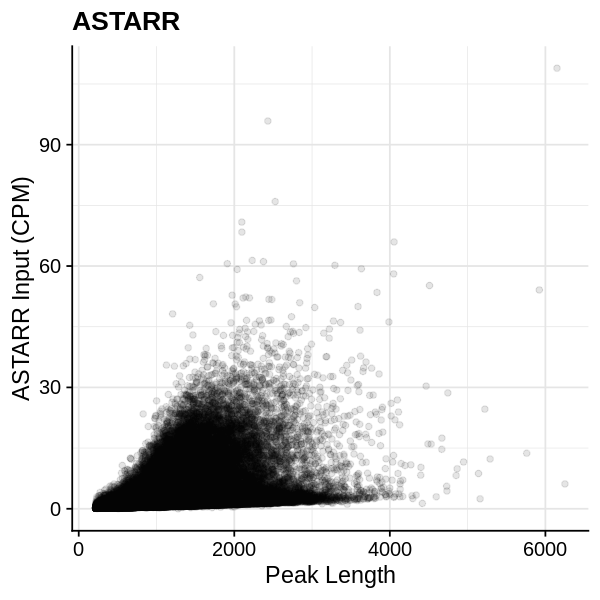

In [14]:
dat = dat_peak_score

gpt = ggplot(dat, aes(x=Length, y=Input)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

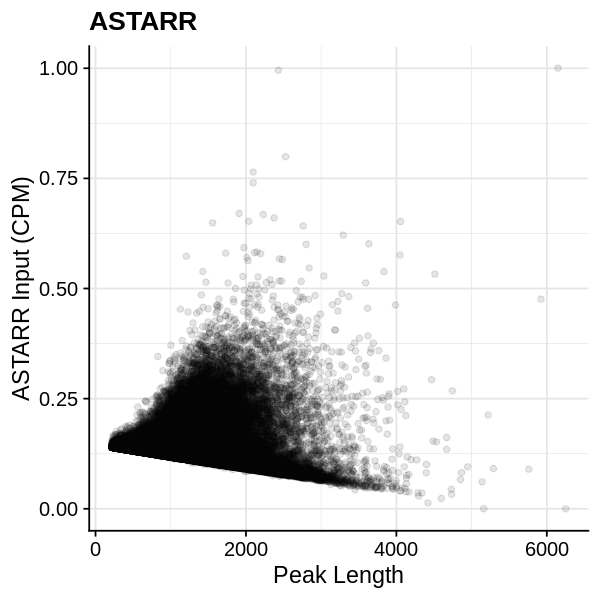

In [15]:
dat = dat_peak_score

gpt = ggplot(dat, aes(x=Length, y=Input_Score)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)